# Excess Deaths in United States Counties 02/01/2020-10/31/2020

### Introduction

On May 7th 2020, billionaire entrepreneur Elon Musk went on the Joe Rogan podcast and insinuated that the United States medical establishment was being liberal in attributing patients cause of death to Covid-19. He claimed that the number of deaths due to Covid-19 reported by mainstream sources such as the CDC and Johns Hopkins University were most likely inflated.  This paper seeks to test the truth value of his claims by estimating the excess deaths in counties across the United States and comparing it to the Covid-19 mortality data released by Johns Hopkins University and CDC.

### Methodology

First, the CDC's yearly mortality data was used to estimate the total number of expected deaths for each county in the United States in the year 2020.  Next, the CDC's weekly mortality data for 122 cities across the united states was used to estimate the proportion of yearly deaths that could be expected to occur within the time period of 02/01/2020-10/31/2020.  Using these two estimates, total expected deaths for each FIPS code were calculated and then compared to the total actual deaths in each county released by the CDC this year.  With this, an interval estimate for excess deaths in each available FIPS code was obtained.  The excess death interval estimates were then compared with the JHU and CDC Covid-19 mortality data to see if there were grounds to trust the JHU numbers.   

## CDC Mortality Data 1968-2018

The CDC Mortality Data is publically available here:
https://www.cdc.gov/nchs/data_access/cmf.htm
The mortality data from 1968-1988 is housed in two zip files. In order to conduct my analysis I had to download the zip files to my computer.  Due to the CDC's privacy concerns, I am not comfortable publishing the text data to github. The data can be deciphered with the codes provided by the CDC in a pdf found on the webpage given.  Mortality Data from 1989-2018 can be found by using their WONDER api found here:
https://wonder.cdc.gov/mortSQL.html and 
https://wonder.cdc.gov/ucd-icd10.html

### Importing and Cleaning Data

In [1]:
#This creates a dataframe for mortality data by US county from 1968-1978
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
file=r'Data\CDC_Wonder\mort6878\Mort6878.txt'
with open(file) as f:
    content=f.readlines()
content=[x.strip() for x in content]
FIPS=[]
for code in content:
    code=code[0:5]
    FIPS.append(code)
year_list=[]
for year in content:
    year=year[5:9]
    year_list.append(year)
deaths=[]
for death in content:
    death=death[19:]
    deaths.append(death)
dfMort6878=pd.DataFrame({'FIPS':FIPS,'year':year_list,'deaths':deaths})
dfMort6878['deaths']=dfMort6878['deaths'].str.lstrip()
dfMort6878.head(10)

,FIPS,year,deaths
0,01001,1968,1
1,01001,1968,2
2,01001,1968,1
3,01001,1968,2
4,01001,1968,1
5,01001,1968,1
6,01001,1968,1
7,01001,1968,1
8,01001,1968,1
9,01001,1968,1


In [2]:
#this does the same thing but for 1979-1988
file=r'Data\CDC_Wonder\mort7988\Mort7988.txt'
with open(file) as f:
    content=f.readlines()
content=[x.strip() for x in content]
FIPS=[]
for code in content:
    code=code[0:5]
    FIPS.append(code)
year_list=[]
for year in content:
    year=year[5:9]
    year_list.append(year)
deaths=[]
for death in content:
    death=death[19:]
    deaths.append(death)
dfMort7988=pd.DataFrame({'FIPS':FIPS,'year':year_list,'deaths':deaths})
dfMort7988['deaths']=dfMort7988['deaths'].str.lstrip()
dfMort7988.head(10)

,FIPS,year,deaths
0,01001,1979,1
1,01001,1979,1
2,01001,1979,1
3,01001,1979,1
4,01001,1979,2
5,01001,1979,1
6,01001,1979,1
7,01001,1979,1
8,01001,1979,1
9,01001,1979,1


In [3]:
#this groups the mortality data by year and FIPS code 
df=pd.concat([dfMort6878,dfMort7988])
df['year']=df.year.astype(int)
df['deaths']=df.deaths.astype(int)
df=df.groupby(['FIPS','year']).sum()
df6888=df
df6888.head(10)

deaths
FIPS  year        
01001 1968     226
      1969     191
      1970     204
      1971     229
      1972     206
      1973     257
      1974     221
      1975     196
      1976     234
      1977     224

In [4]:
#This imports each cdc mortality data set from 1989-2016.  Raw text data file was initially cleaned up by hand.
df_list=[]
for i in range(1989,2017):
    file=r'Data\CDC_Wonder\Compressed_Mortality\Compressed Mortality, '+str(i)+' edit.txt'
    df=pd.read_csv(file,delim_whitespace=True)
    df=df.loc[df['Deaths']!='Missing']
    df=df.loc[df['Deaths']!='Suppressed']
    df_list.append(df)
for i,j in list(zip([x for x in range(len(df_list))],[x for x in range(1989,2017)])):
    df_list[i]['year']=j

In [5]:
#does the same thing for 2017-2018
df_list_short=[]
for i in range(2017,2019):
    file=r'Data\CDC_Wonder\Multiple_Cause\Multiple Cause of Death, '+str(i)+' edit.txt'
    df=pd.read_csv(file,delim_whitespace=True)
    df=df.loc[df['Deaths']!='Missing']
    df=df.loc[df['Deaths']!='Suppressed']
    df_list_short.append(df)
for i,j in list(zip([x for x in range(len(df_list_short))],[x for x in range(2017,2019)])):
    df_list_short[i]['year']=j
df_list.append(df_list_short[0])
df_list.append(df_list_short[1])

In [6]:
#combines and cleans up data
df=pd.concat(df_list)
df=df.drop(['County','Population','CrudeRate','Rel'], axis=1)
df.columns=['FIPS', 'deaths', 'year']
df['deaths']=df['deaths'].astype(int)
df['FIPS']=df['FIPS'].astype(str)
df.reset_index().drop(['index'], axis=1)
change=list(df.FIPS.values)
fips=[]
for element in change:
    if len(element)==4:
        element='0'+element
        fips.append(element)
    else:
        fips.append(element)
df.FIPS=fips
df=df.groupby(['FIPS','year']).sum()
df8918=df
df8918.head(10)

deaths
FIPS  year        
01001 1989     259
      1990     304
      1991     283
      1992     310
      1993     309
      1994     354
      1995     298
      1996     345
      1997     328
      1998     372

In [7]:
df=pd.concat([df6888,df8918])
df.head(10)

deaths
FIPS  year        
01001 1968     226
      1969     191
      1970     204
      1971     229
      1972     206
      1973     257
      1974     221
      1975     196
      1976     234
      1977     224

In [8]:
fips_list=list(df.reset_index().FIPS.unique())

In [9]:
df_list=[]
for fips in fips_list:
    df_list.append(df.loc[[fips]])

Let us make sure that each FIPS code has sufficient degrees of freedom to estimate, and to see if there are any discrepancies worth noting.

In [10]:
test=[1]
for i in range(1,len(df_list)):
    if set(df_list[0].reset_index().year.values) == set(df_list[i].reset_index().year.values):
        test.append(1)
    else:
        test.append(0)
change_list=[]
for i, j in enumerate(test,start=0):
    if j==0:
        change_list.append(i)
change_list

[67,
 158,
 228,
 241,
 243,
 254,
 270,
 271,
 302,
 516,
 533,
 537,
 893,
 957,
 1398,
 1573,
 1584,
 1586,
 1602,
 1607,
 1619,
 1624,
 1627,
 1628,
 1629,
 1662,
 1667,
 1670,
 1676,
 1681,
 1682,
 1683,
 1707,
 1710,
 1716,
 1722,
 1723,
 1731,
 1776,
 1963,
 1992,
 2001,
 2003,
 2005,
 2341,
 2362,
 2368,
 2389,
 2390,
 2397,
 2509,
 2543,
 2579,
 2610,
 2623,
 2624,
 2627,
 2643,
 2648,
 2672,
 2689,
 2708,
 2709,
 2714,
 2751,
 2763,
 2886,
 2887,
 2888,
 2889,
 2891,
 2892,
 2893,
 2894,
 2895,
 2896,
 2897,
 2898,
 2899,
 2900,
 2902,
 2903,
 2904,
 2905,
 2906,
 2907,
 2908,
 2911,
 2912,
 2913,
 2914,
 2915,
 2916,
 2917,
 2918,
 2919,
 2920,
 2923,
 2924,
 2925,
 3115,
 3116,
 3117,
 3118,
 3119,
 3120,
 3121,
 3122,
 3123,
 3124,
 3125,
 3126,
 3127,
 3128,
 3129,
 3130,
 3131,
 3132,
 3133,
 3134,
 3135,
 3136,
 3137,
 3138,
 3139,
 3140,
 3141,
 3142,
 3143,
 3144,
 3145,
 3146,
 3147,
 3148,
 3149,
 3150]

In [11]:
len(change_list)

136

In [12]:
len(df_list)

3151

For convenience we will get rid of these FIPS codes that have incomplete datasets 

In [13]:
for index in change_list[::-1]:
    del df_list[index]

### Modeling

#### ARI Model

In [14]:
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(df, arima_order):
    # prepare training dataset
    df['deaths']=df['deaths'].astype(float)
    X=df.deaths.values
    train, test = X[:-2], X[-2:]
    # make predictions
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast(steps=len(test))
    # calculate out of sample error
    mse = mean_squared_error(test, pred[0])
    mae=mean_absolute_error(test, pred[0])
    return mse, mae
 
def arima_dict(p_values,d_values,q_values):
    emptydict={}
    for p in p_values:
        if p==0:
            for d in d_values:
                for q in q_values:
                    order=(p,d,q)
                    emptydict[str(order)]=[]
        else:
            for d in d_values:
                for q in [0]:
                    order=(p,d,q)
                    emptydict[str(order)]=[]
    return emptydict
                
def evaluate_models(df, p_values, d_values, q_values,dict_mse,dict_mae):
    temp_mse=[]
    temp_mae=[]
    for p in p_values:
        if p==0:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    mse, mae=evaluate_arima_model(df,order)
                    temp_mse.append(mse)
                    temp_mae.append(mae)
        else:
            for d in d_values:
                for q in [0]:
                    order = (p,d,q)
                    mse, mae=evaluate_arima_model(df,order)
                    temp_mse.append(mse)
                    temp_mae.append(mae)
    temp_mse.sort()
    temp_mae.sort()
    dict_mse[str(order)].append(temp_mse[0])
    dict_mae[str(order)].append(temp_mae[0])

C:\Users\Jared\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [69]:
p_values = [0, 1, 2,3,4,5]
d_values = [1]
q_values = [0,1,2]
dict_mse=arima_dict(p_values,d_values,q_values)
dict_mae=arima_dict(p_values,d_values,q_values)
warnings.filterwarnings("ignore")
for i in range(len(df_list)):
    evaluate_models(df_list[i],p_values,d_values,q_values,dict_mse,dict_mae)

In [70]:
mse_dict={}
for order, mse_list in dict_mse.items():
    mse_dict[order]=np.sum(np.array(mse_list))
mae_dict={}
for order, mae_list in dict_mae.items():
    mae_dict[order]=np.sum(np.array(mae_list))

In [71]:
mse_dict

{'(0, 1, 0)': 0.0,
 '(0, 1, 1)': 0.0,
 '(0, 1, 2)': 0.0,
 '(1, 1, 0)': 0.0,
 '(2, 1, 0)': 0.0,
 '(3, 1, 0)': 0.0,
 '(4, 1, 0)': 0.0,
 '(5, 1, 0)': 9931074.658272207}

In [72]:
mae_dict

{'(0, 1, 0)': 0.0,
 '(0, 1, 1)': 0.0,
 '(0, 1, 2)': 0.0,
 '(1, 1, 0)': 0.0,
 '(2, 1, 0)': 0.0,
 '(3, 1, 0)': 0.0,
 '(4, 1, 0)': 0.0,
 '(5, 1, 0)': 77536.2240820878}

ARI(5,1) has the best performance for all FIPS code, and has a combined MAE of 77536.224 

Lets get a visual of the model accuracy

In [41]:
def ari_pred_chart(df,city):
    plt.rcParams['figure.figsize'] = [10, 10]
    df['deaths']=df['deaths'].astype(float)
    X=df.deaths.values
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast(steps=len(test))
    dfnew=df.reset_index()
    model_fit.plot_predict(end=52)
    plt.ylabel('yearly deaths')
    plt.xlabel('period')
    plt.title('Yearly Deaths in '+city+ ' from 1968-2018 with Predictions for 2019 and 2020')
    plt.show()

In [42]:
#plug in fips codes to find their place in the list of dataframes
for i in range(len(df_list)):
    if df_list[i].index[0][0] == '29510':
        print(i)    

1552


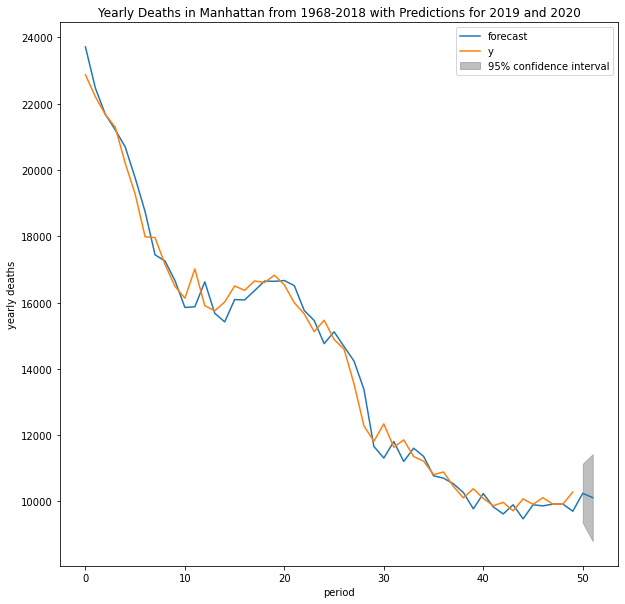

In [43]:
ari_pred_chart(df_list[1789],'Manhattan')

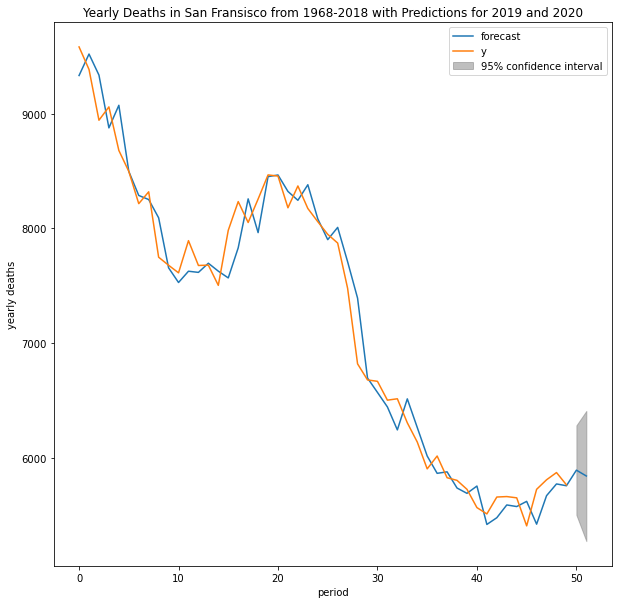

In [44]:
ari_pred_chart(df_list[192],'San Fransisco')

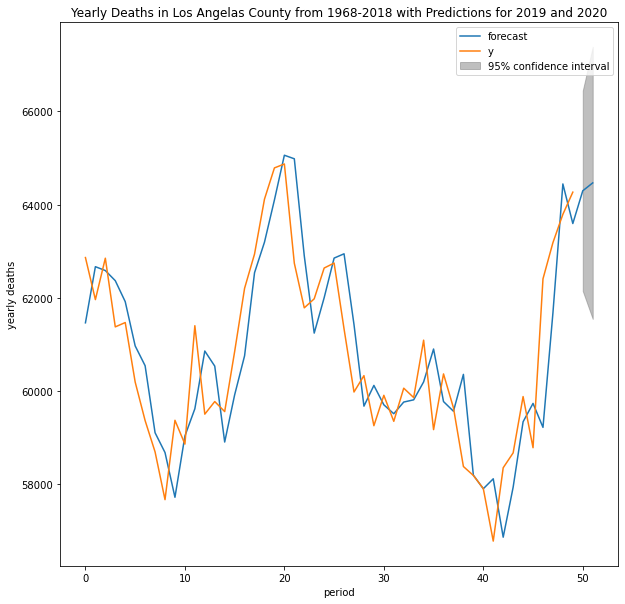

In [45]:
ari_pred_chart(df_list[173],'Los Angelas County')

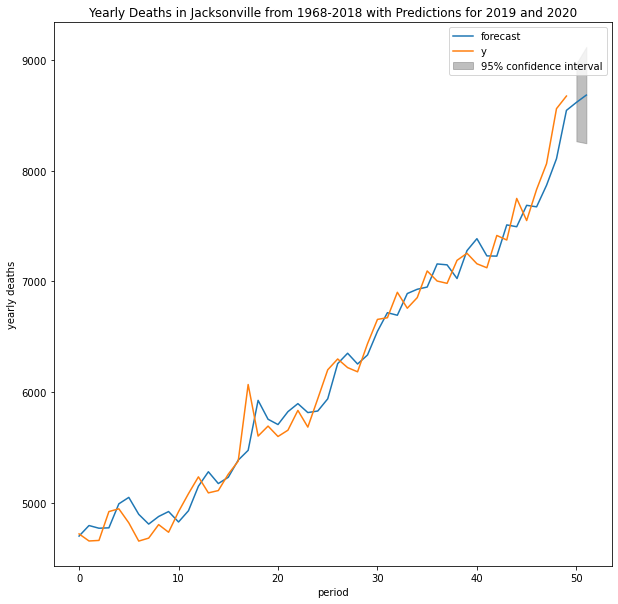

In [46]:
ari_pred_chart(df_list[296],'Jacksonville')

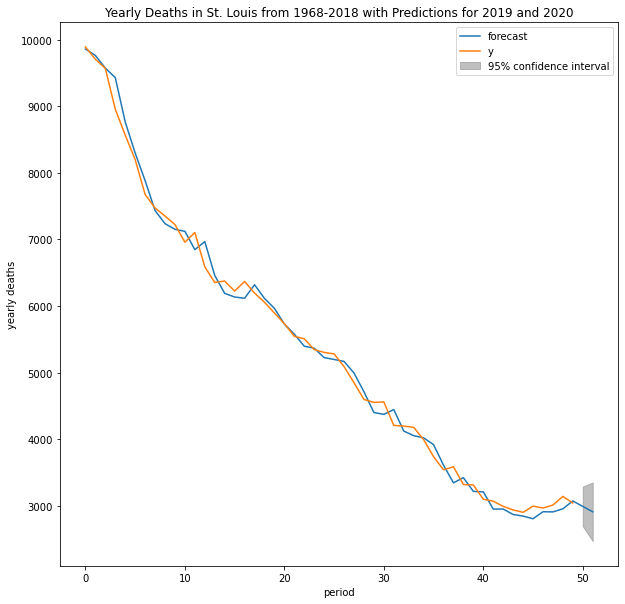

In [47]:
ari_pred_chart(df_list[1552], 'St. Louis')

It looks like our model is capable of following the general trend of the data.  This is suffencent performace for our purposes.   

In [25]:
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
def arima_model_predict(df, arima_order):
    # prepare training dataset
    df['deaths']=df['deaths'].astype(float)
    df=pd.DataFrame(df.reset_index())
    train=df.deaths.values
    fips=[df['FIPS'].values[0]]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast(steps=2)
    death=[pred[0][1]]
    death_L95=[pred[2].reshape(1,-1)[0][2]]
    death_U95=[pred[2].reshape(1,-1)[0][3]]
    df_new=pd.DataFrame({'FIPS': fips, 'deaths':death, 'deaths_L95':death_L95,'deaths_U95':death_U95})
    return df_new
df_list_new=[]
for i in range(len(df_list)):
    df=arima_model_predict(df_list[i],(5,1,0))
    df_list_new.append(df)
df_final=pd.concat(df_list_new,axis=0)
df_final=df_final.set_index('FIPS')

In [26]:
df_final

,deaths,deaths_L95,deaths_U95
FIPS,,,
01001,545.776478,494.748833,596.804124
01003,2361.166953,2266.223528,2456.110379
01005,287.382131,235.903065,338.861196
01007,270.335151,242.329715,298.340587
01009,698.978032,642.538921,755.417143
...,...,...,...
56037,321.111036,274.586692,367.635379
56039,87.261790,70.713181,103.810398
56041,151.022869,130.413652,171.632086


# CDC Weekly Mortality Data for 121 Cities 1962-2016

## Importing and Cleaning Data 

The CDC dataset used here provides the total number of weekly deaths in 121 US cities from 1962-2016.  It also provides the age breakdown of weekly deaths, as well as deaths due to flu and pneumonia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_csv('https://data.cdc.gov/api/views/mr8w-325u/rows.csv?accessType=DOWNLOAD',index_col='Week Ending Date',parse_dates=True)

In [2]:
df.head()   

,Year,WEEK,REGION,State,City,Pneumonia and Influenza Deaths,All Deaths,<1 year (all cause deaths),1-24 years (all cause deaths),25-44 years,45-64 years (all cause deaths),65+ years (all cause deaths)
Week Ending Date,,,,,,,,,,,,
1962-01-06,1962,1,1,MA,Boston,11.0,262.0,10.0,8.0,11.0,87.0,146.0
1962-01-13,1962,2,1,MA,Boston,11.0,270.0,14.0,8.0,11.0,70.0,167.0
1962-01-20,1962,3,1,MA,Boston,5.0,237.0,11.0,8.0,10.0,66.0,142.0
1962-01-27,1962,4,1,MA,Boston,12.0,285.0,22.0,7.0,8.0,73.0,175.0
1962-02-03,1962,5,1,MA,Boston,5.0,245.0,15.0,9.0,17.0,62.0,142.0


We are only interested in the State, City and All Deaths Columns

In [3]:
df=df.drop(columns=['Year', 'WEEK', 'REGION',
       'Pneumonia and Influenza Deaths',
       '<1 year (all cause deaths)', '1-24 years (all cause deaths)',
       '25-44 years', '45-64 years (all cause deaths)',
       '65+ years (all cause deaths)'])

In [4]:
df.head()

,State,City,All Deaths
Week Ending Date,,,
1962-01-06,MA,Boston,262.0
1962-01-13,MA,Boston,270.0
1962-01-20,MA,Boston,237.0
1962-01-27,MA,Boston,285.0
1962-02-03,MA,Boston,245.0


In [5]:
df.tail()

,State,City,All Deaths
Week Ending Date,,,
2016-09-03,WA,Tacoma,136.0
2016-09-10,WA,Tacoma,136.0
2016-09-17,WA,Tacoma,129.0
2016-09-24,WA,Tacoma,143.0
2016-10-01,WA,Tacoma,136.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346342 entries, 1962-01-06 to 2016-10-01
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340300 non-null  object 
 1   City        340300 non-null  object 
 2   All Deaths  344871 non-null  float64
dtypes: float64(1), object(2)
memory usage: 10.6+ MB


### Dealing with Missing Values

In [7]:
df.loc[(df['City'].isnull()==True) & df['State'].isnull()==True].shape

(6042, 3)

In [8]:
df.loc[(df['City'].isnull()==True)].shape

(6042, 3)

In [9]:
df.loc[df['State'].isnull()==True].shape

(6042, 3)

In [10]:
df.loc[df['All Deaths'].isnull()==True].City.unique()

array(['Boston', 'Hartford', 'Bridgeport', 'Allentown', 'Cambridge',
       'Fall River', 'Yonkers', 'South Bend', 'Youngstown', 'Des Moines',
       'Kansas City', 'Lincoln', 'Lynn', 'New Bedford', 'Providence',
       'Somerville', 'Springfield', 'Waterbury', 'Worcester', 'Buffalo',
       'Camden', 'Elizabeth', 'Jersey City', 'New York', 'Newark',
       'Paterson', 'Philadelphia', 'Reading', 'Schenectady', 'Scranton',
       'Syracuse', 'Trenton', 'Utica', nan, 'Chicago', 'Cincinnati',
       'Cleveland', 'Columbus', 'Detroit', 'Evansville', 'Fort Wayne',
       'Gary', 'Indianapolis', 'Milwaukee', 'Peoria', 'Rockford',
       'Toledo', 'Duluth', 'Minneapolis', 'Saint Louis', 'Saint Paul',
       'Atlanta', 'Wichita', 'Wilimington', 'Charlotte', 'Birmingham',
       'Baton Rouge', 'Corpus Christi', 'New Orleans', 'Jacksonville',
       'Miami', 'Norfolk', 'Richmond', 'Saint Petersburg', 'Washington',
       'Chattanooga', 'Knoxville', 'Lexington', 'Memphis', 'Mobile',
       'Montg

In [11]:
len(df.loc[df['All Deaths'].isnull()==True].City.unique())

102

102 Cities have missing values for All Deaths.  We should investigate how these missing values are distributed, but it is safe delete the entries with missing state and city values.

In [12]:
df=df.dropna(subset=['State','City'],axis=0)

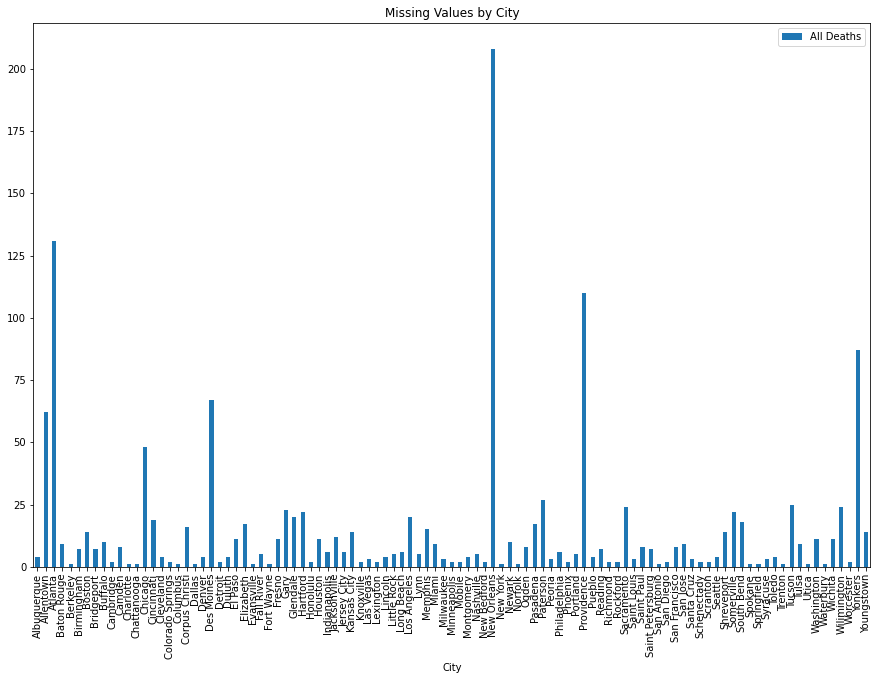

In [13]:
df.loc[df['All Deaths'].isnull()==True].fillna(1).groupby('City').sum().plot(kind='bar')
plt.title('Missing Values by City')
plt.show()

It is clear that some cities have a large number of missing values in their respective datasets.

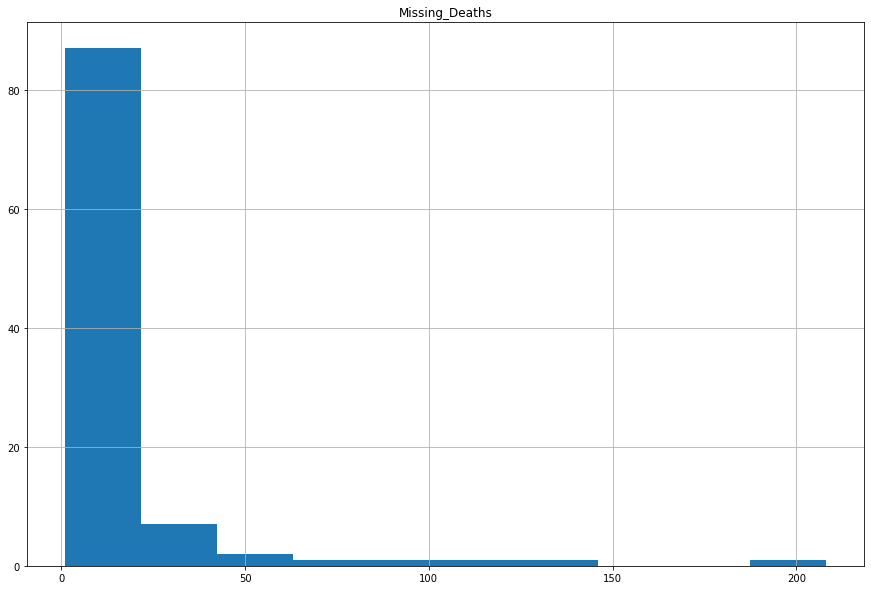

In [14]:
missing=pd.DataFrame(df.loc[df['All Deaths'].isnull()==True].fillna(1).groupby('City').sum())
missing.columns=['Missing_Deaths']
missing.hist()
plt.show()

The majority of cities have fewer than 50 missing values.  I will drop the outlier cities that are more than three standard deviations from the mean.  

In [15]:
s=missing.Missing_Deaths.std()
x_bar=missing.Missing_Deaths.mean()
upper,lower = x_bar + 3*s, x_bar - 3*s
missing=missing[(missing['Missing_Deaths']<upper)&(missing['Missing_Deaths']>lower)]

In [16]:
cities_final=missing.index

In [17]:
df=pd.DataFrame(df.loc[df['City'].isin(cities_final)])

In [18]:
df.isnull().sum()

State           0
City            0
All Deaths    962
dtype: int64

In [19]:
df.City.unique()

array(['Boston', 'Hartford', 'Bridgeport', 'Cambridge', 'Somerville',
       'Allentown', 'Fall River', 'Camden', 'Yonkers', 'Gary',
       'South Bend', 'Youngstown', 'Des Moines', 'Kansas City', 'Lincoln',
       'Lynn', 'New Bedford', 'Springfield', 'Waterbury', 'Worcester',
       'Buffalo', 'Elizabeth', 'Jersey City', 'New York', 'Newark',
       'Paterson', 'Philadelphia', 'Reading', 'Schenectady', 'Scranton',
       'Syracuse', 'Trenton', 'Utica', 'Chicago', 'Cincinnati',
       'Cleveland', 'Columbus', 'Detroit', 'Evansville', 'Fort Wayne',
       'Indianapolis', 'Milwaukee', 'Peoria', 'Rockford', 'Toledo',
       'Duluth', 'Minneapolis', 'Saint Louis', 'Saint Paul', 'Wichita',
       'Wilimington', 'Charlotte', 'Jacksonville', 'Birmingham',
       'Baton Rouge', 'Corpus Christi', 'Miami', 'Norfolk', 'Richmond',
       'Saint Petersburg', 'Washington', 'Chattanooga', 'Knoxville',
       'Lexington', 'Memphis', 'Mobile', 'Montgomery', 'Nashville',
       'Dallas', 'El Paso', 'Ho

We will fill each missing value left over with the average number of deaths with respect to each city

In [20]:
city_list=list(df.City.unique())
df_list=[]
for i in range(len(city_list)):
    x=pd.DataFrame(df[df.City==city_list[i]]).fillna(df[df.City==city_list[i]]['All Deaths'].mean())
    x=x.loc[:'2015',:].dropna()
    df_list.append(x)
df=pd.concat(df_list)

There is also a chance that values of zero were present instead of NaN.  

In [21]:
df[df['All Deaths']==0]['City'].value_counts()

Des Moines      92
Somerville      10
Jacksonville     7
Shreveport       4
Baton Rouge      4
Paterson         3
Seattle          2
Tulsa            2
Saint Louis      2
Lynn             2
Gary             1
Washington       1
Trenton          1
Little Rock      1
Berkeley         1
Philadelphia     1
Wilimington      1
Indianapolis     1
Duluth           1
San Jose         1
San Antonio      1
Name: City, dtype: int64

In [22]:
df[(df['All Deaths']==0) & (df['City']== 'Des Moines')].loc['2015'].resample('A').sum()

,All Deaths
Week Ending Date,
2015-12-31,0.0


It can be shown that the entire year was recorded as zero for Des Moines.  Rather than have one city with a different year count than the others, We will eliminate Des Moines from our dataset for convenience.

In [23]:
df=pd.DataFrame(df[df['City'] != 'Des Moines'])
city_list=list(df.City.unique())
df_list=[]
for i in range(len(city_list)):
    x=pd.DataFrame(df[df.City==city_list[i]])
    df_list.append(x)
df=pd.concat(df_list)

Note: the year 2016 was deleted because the year was incomplete for all cities

### Feature Engineering

We are concerned with finding the proportion of monthly deaths relative to the yearly total in each city.  We will use this to forecast the expected proportion of yearly deaths to occur between 02/01/2020 and 08/01/2020.  The data represents each city as a time series from 1962-2015

In [24]:
city_list=list(df.City.unique())
df_list_two=[]
for i in range(len(city_list)):
    x=df_list[i]
    xmonth=pd.DataFrame(x['All Deaths'].resample('M').sum())
    xmonth['index']=xmonth.index
    xyear=pd.DataFrame(x['All Deaths'].resample('A').sum())
    xyear['index']=xyear.index
    x=pd.merge(xmonth,xyear,on='index',how='outer').fillna(method='bfill')
    x=x.set_index(pd.DatetimeIndex(x['index'])).drop(columns='index').dropna()
    x.columns=['month_death','year_death']
    x['month/year']=x['month_death']/x['year_death']
    df_list_two.append(x)

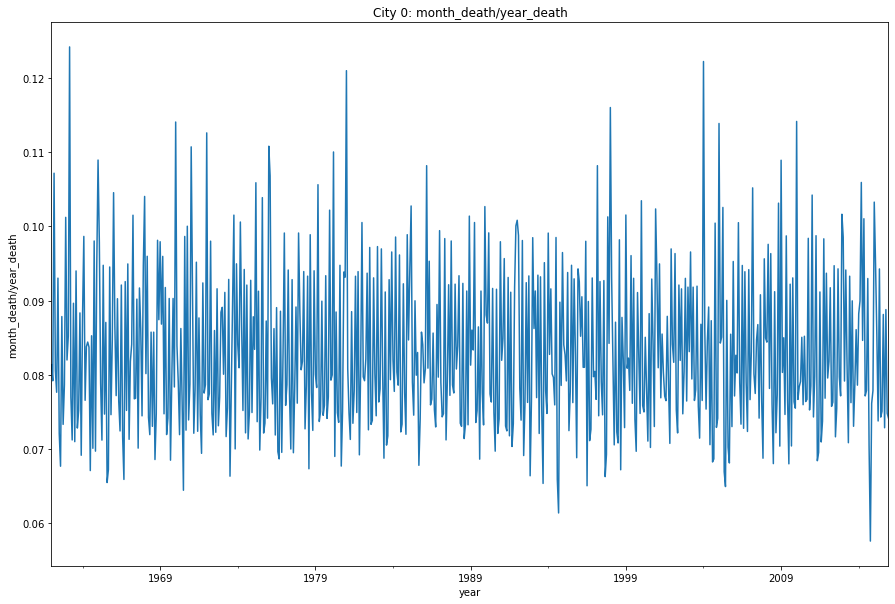

In [25]:
df_list_two[0]['month/year'].plot()
plt.title('City 0: month_death/year_death')
plt.xlabel('year')
plt.ylabel('month_death/year_death')
plt.show()

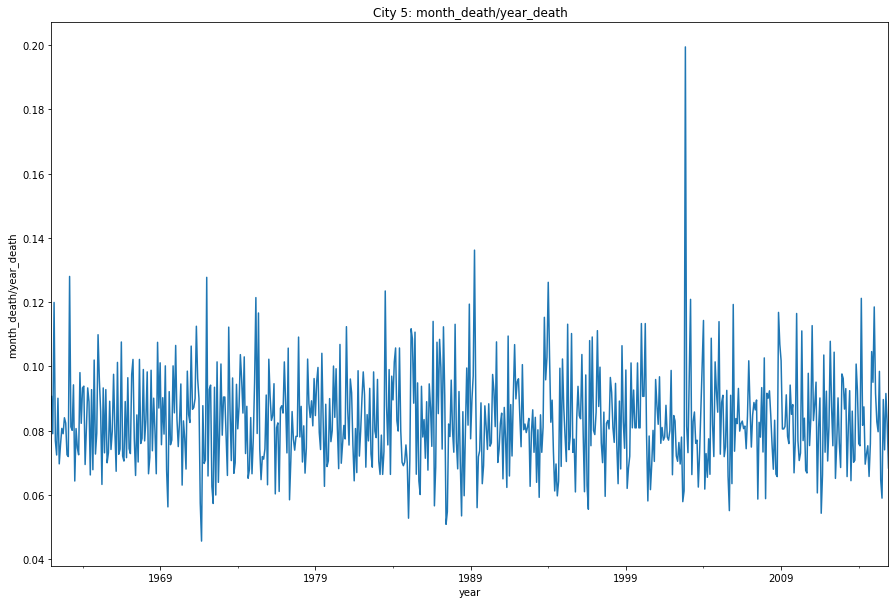

In [26]:
df_list_two[5]['month/year'].plot()
plt.title('City 5: month_death/year_death')
plt.xlabel('year')
plt.ylabel('month_death/year_death')
plt.show()

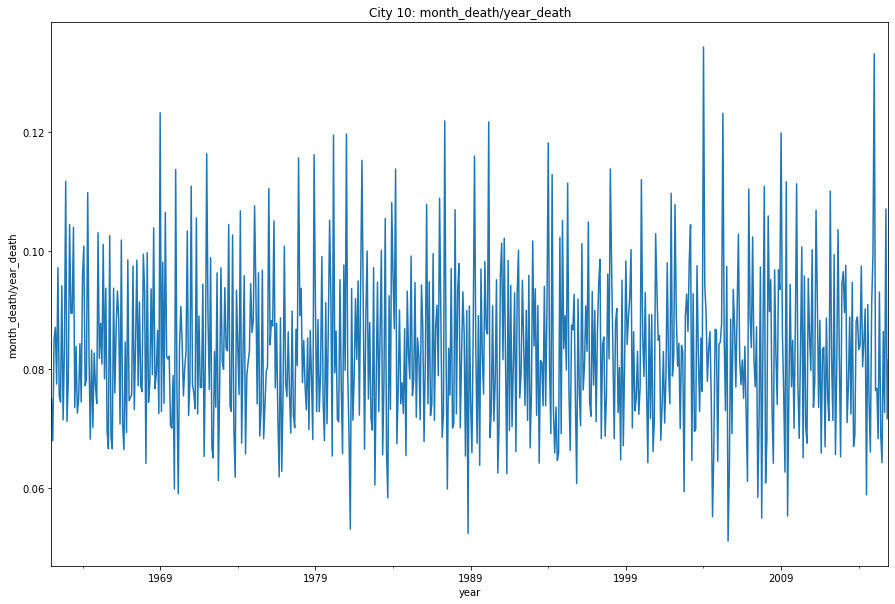

In [27]:
df_list_two[10]['month/year'].plot()
plt.title('City 10: month_death/year_death')
plt.xlabel('year')
plt.ylabel('month_death/year_death')
plt.show()

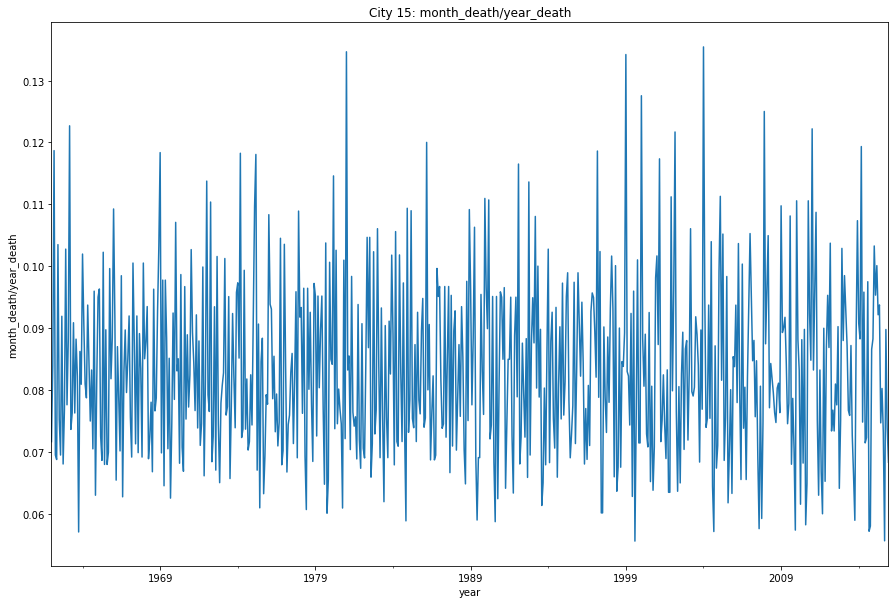

In [28]:
df_list_two[15]['month/year'].plot()
plt.title('City 15: month_death/year_death')
plt.xlabel('year')
plt.ylabel('month_death/year_death')
plt.show()

#### Outliers

As can be seen most clearly in the plot of 'City 5', outliers are present in the data.  Because this analysis is looking to model the normal or most common behavior of this phenomena, extreme outliers should be eliminated.  We are already seeking to make predictions 5 years out from the data set, we do not want any recent extreme results to contaminate our results.

We will replace outlier points with the mean of their respective cities

In [29]:
for X in df_list_two:
    x_bar=X['month/year'].mean()
    s=X['month/year'].std()
    upper_bound, lower_bound = x_bar + 3*s,x_bar - 3*s
    X.loc[X['month/year']>upper_bound,'month/year']= X['month/year'].mean()
    X.loc[X['month/year']<lower_bound,'month/year']= X['month/year'].mean()

#### Resampling

We are attempting to make predictions five years out from the data set. This means that if we use the monthly proportion of deaths, we will be forecasting 70 periods into the future. This is unreasonable and borderline impossible. Since we are only interested in the proportion of total yearly deaths by month for the months of February through October, we will sum these months for each year, and drop all extraneous information. This will limit the size of our dataset, but is will allow us to make more reasonable predictions. It is a worthy tradeoff.

In [30]:
df_list_three=[]
for test in df_list_two:
    test['index']=test.index
    january=test['index'].astype(str).str.contains('-01-')
    november=test['index'].astype(str).str.contains('-11-')
    december=test['index'].astype(str).str.contains('-12-')
    test=pd.DataFrame(test.loc[~january & ~november & ~december])
    test=test.resample('A').sum()
    test=test[['month/year']]
    df_list_three.append(test)
df_list_two=df_list_three

Now to check that all cities data is over the same time interval

In [31]:
test=[1]
for i in range(1,len(df_list_two)):
    if set(df_list_two[0].index) == set(df_list_two[i].index):
        test.append(1)
    else:
        test.append(0)

In [32]:
np.sum(np.array(test))

93

In [33]:
len(test)

97

In [34]:
for i, j in enumerate(test,start=0):
    if j==0:
        print(i)

25
62
79
94


For different reasons, the cities that share these index’s have data that is incomplete.  It either begins after 1962, or terminates before 2015.  We will terminate the data sets for convenience.

In [35]:
del df_list_two[94]
del df_list_two[79]
del df_list_two[62]
del df_list_two[25]

In [36]:
len(df_list_two)

93

We are now left with time series for 93 U.S. cities listing the total proportion of yearly deaths that occurred within the months of February through October, from years 1962-2015.

### Modeling 

#### AR Model

##### Test for Stationary 

In [37]:
#This loop will notify when cities have a p-value greater than .001:
from statsmodels.tsa.stattools import adfuller
p_value_list=[]
for i in range(len(df_list_two)):
    X = df_list_two[i]['month/year'].values
    result = adfuller(X)
    if result[1] > .001:
        p_value_list.append((int(i),result[1]))
print(p_value_list)     

[(13, 0.32859214869346515), (14, 0.3112564123674604), (18, 0.3855271966478052), (19, 0.09457758552530615), (51, 0.007054345668658072), (58, 0.03769864033189768), (67, 0.0012418925370639292), (70, 0.3718478795004497), (73, 0.46970702055603786)]


For convenience we will delete all time series from cities that are non-stationary

In [38]:
indecies=[]
for item in p_value_list:
    indecies.append(item[0])
for index in sorted(indecies, reverse=True):
    del df_list_two[index]

And now for the modeling.  We only investigate AR(1) through AR(6) because past that we start to see convergance issues for some of the datasets.

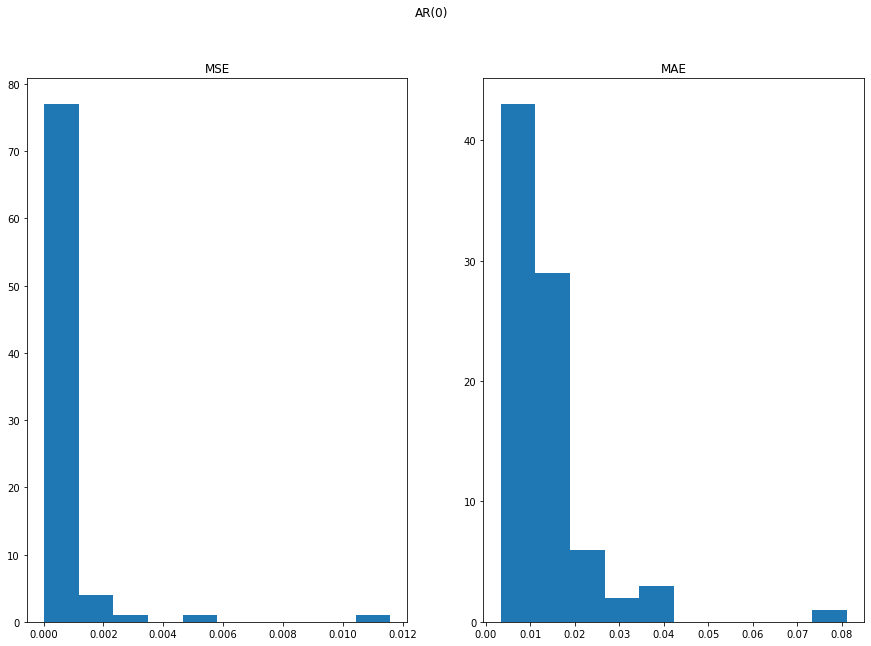

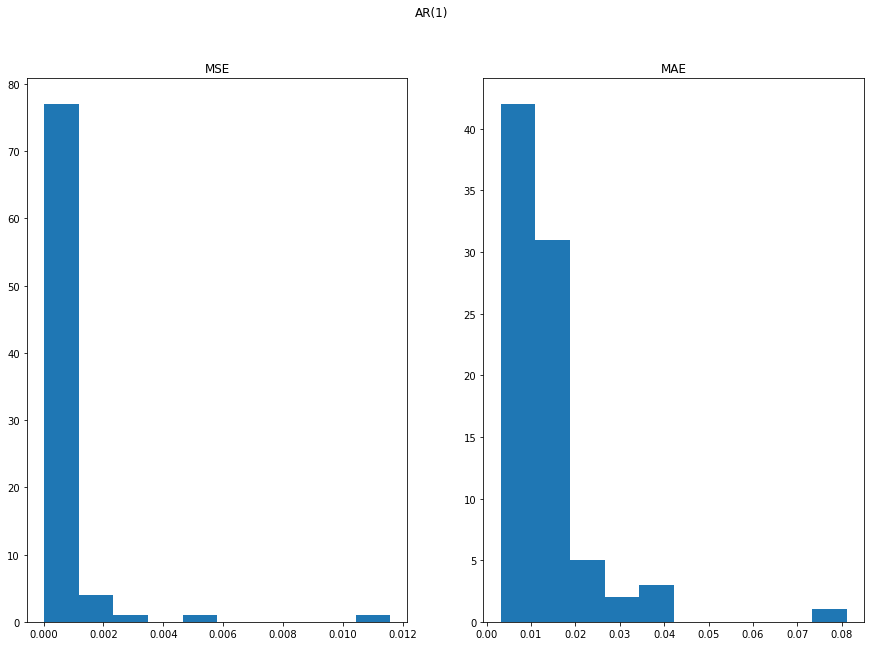

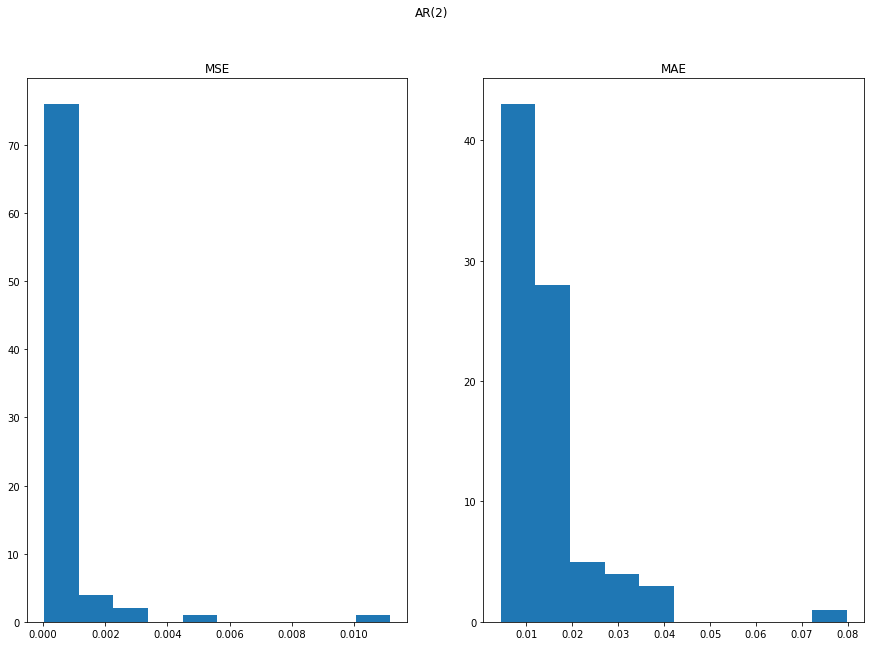

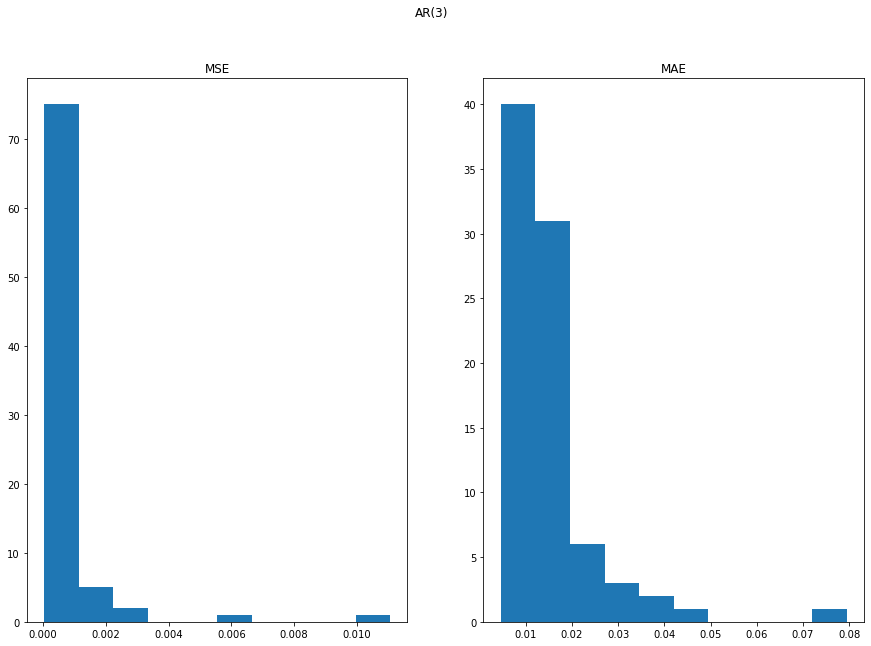

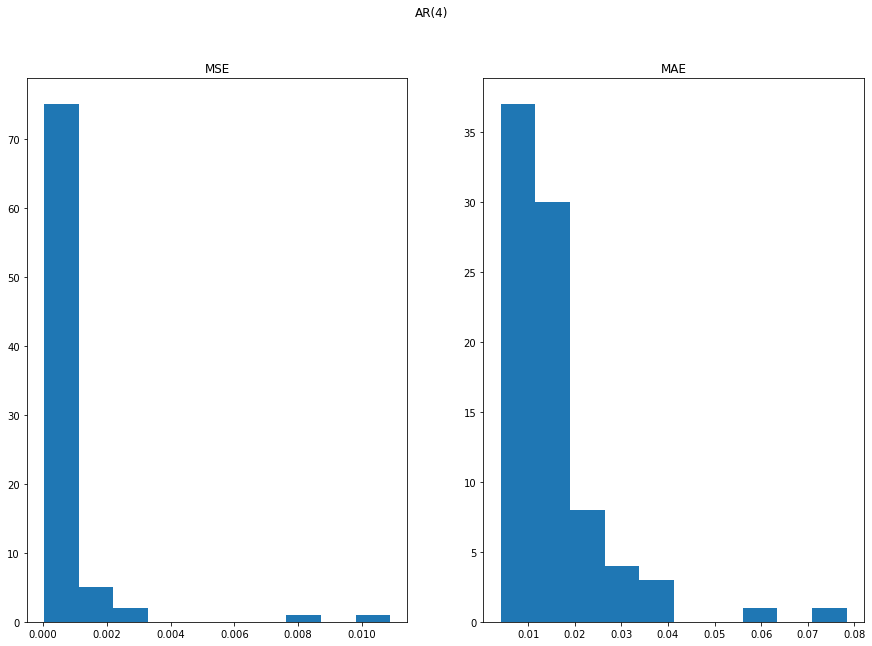

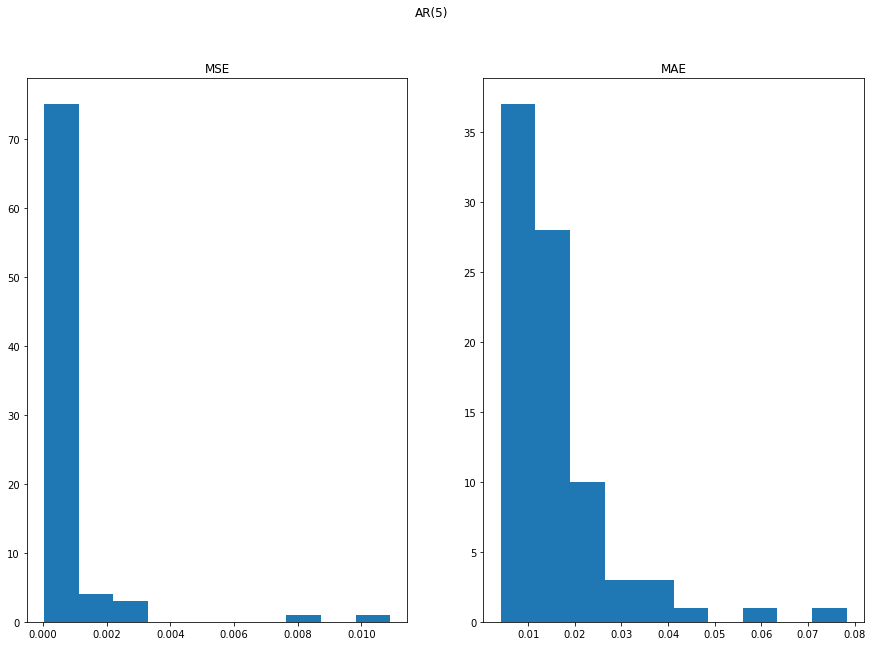

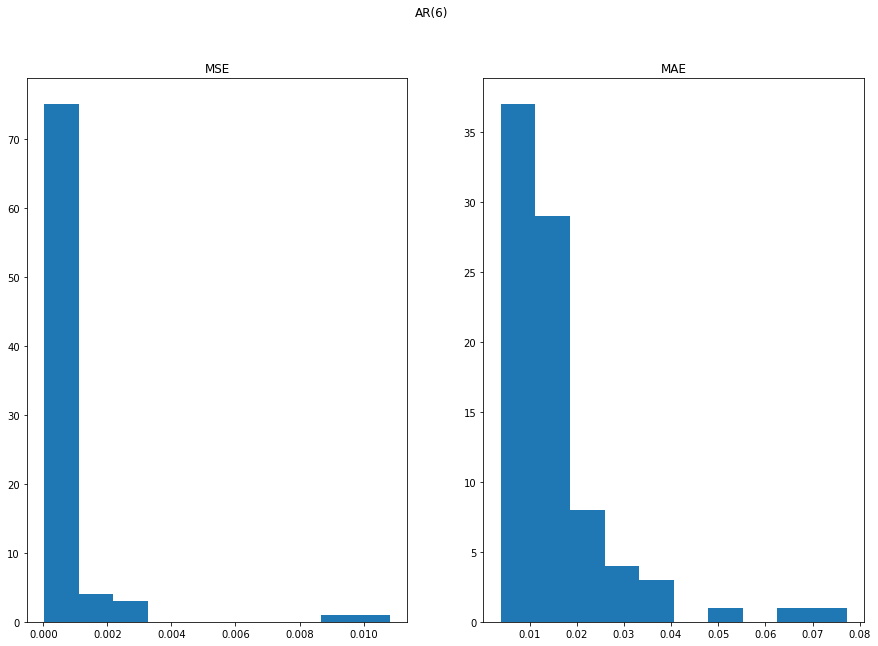

([0.04383531313198729,
  0.04352751597485173,
  0.045688052025305285,
  0.04749070258220321,
  0.050459637967265575,
  0.05255707440884098,
  0.05263284149515148],
 [1.1788823872584404,
  1.1730046565916579,
  1.2187016790878034,
  1.2444836007832916,
  1.274388021059818,
  1.3018140153137032,
  1.2930328612284083])

In [86]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

def AR(df_list,plots=False):
    """This fuction loops through a list of DataFrames and applys"""
    """AR models to the entire list, prints histograms of the MSE/MAE"""
    """Distributions to check for outliers, and sums MSE/MAE across"""
    """all datasets for each AR model"""
    MSE_List_AR=[]
    MAE_List_AR=[]
    for i in range(0,7):
        mse_list=[]
        mae_list=[]
        for df in df_list:
            X = df['month/year'].values
            train, test = X[:(len(X)-5)], X[(len(X)-5):]
            model = ARIMA(train, order=(i,0,0))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast(steps=len(test))
            MSE=mean_squared_error(test,output[0])
            MAE=mean_absolute_error(test,output[0])
            mse_list.append(MSE)
            mae_list.append(MAE)
        if plots==True:
            fig, (ax1,ax2) = plt.subplots(1,2)
            fig.suptitle('AR('+str(i)+')')
            ax1.hist(mse_list)
            ax1.set_title('MSE')
            ax2.hist(mae_list)
            ax2.set_title('MAE')
            plt.show()
        mse_sum=np.sum(np.array(mse_list))
        mae_sum=np.sum(np.array(mae_list))
        MSE_List_AR.append(mse_sum)
        MAE_List_AR.append(mae_sum)
    return MSE_List_AR, MAE_List_AR

AR(df_list_two,plots=True)

After inspecting the charts above, we can see that some datasets contribute up to 8 times more than others to the summed MSE. Let us delete the datasets that contribute the most error, and try again. 

In [41]:
#AR(5) had the most combined error, so we will try to use that as a baseline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_list=[]
for df in df_list_two:
    X = df['month/year'].values
    train, test = X[:(len(X)-5)], X[(len(X)-5):]
    model = ARIMA(train, order=(5,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=len(test))
    MAE=mean_absolute_error(test,output[0])
    mae_list.append(MAE)

In [42]:
indecies=[]
for i, j in enumerate(list(np.array(mae_list)<.02),start=0):
    if j==False:
        indecies.append(i)        
for index in indecies[::-1]:
    del df_list_two[index]

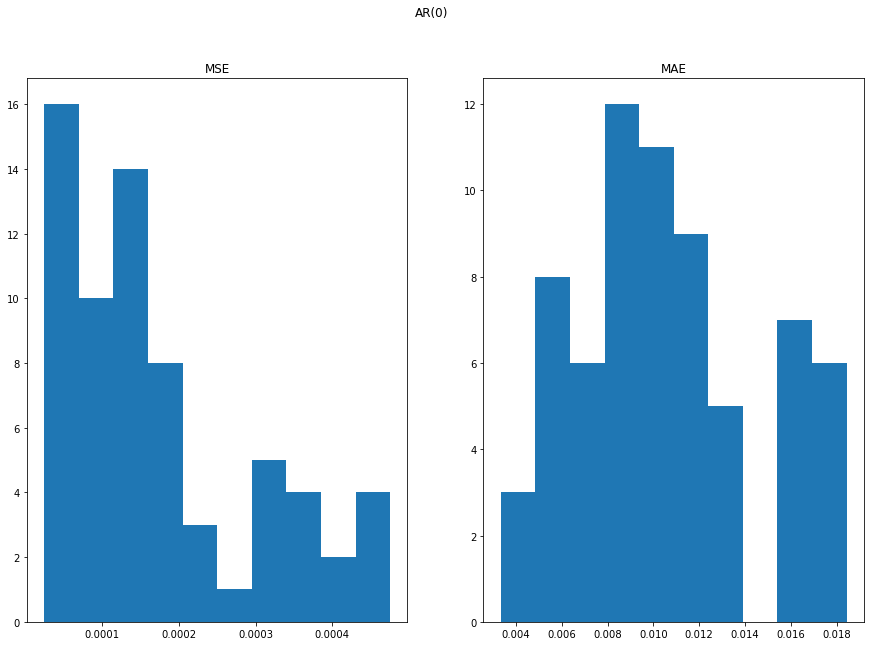

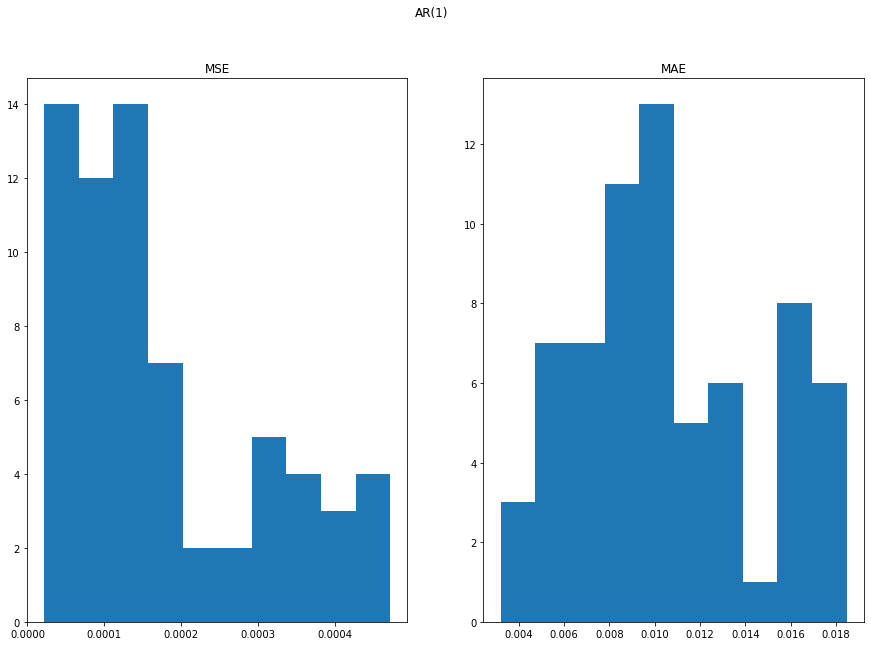

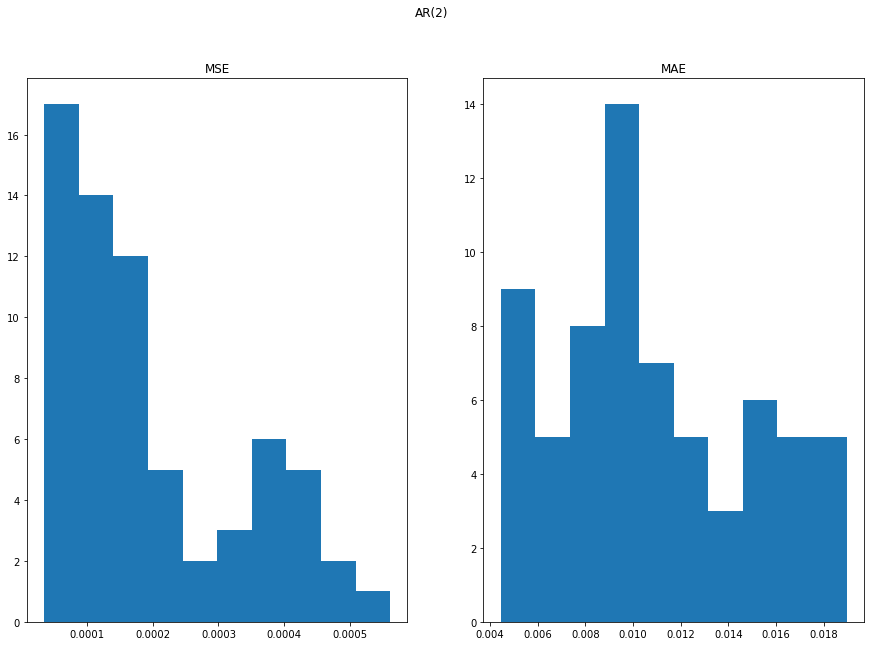

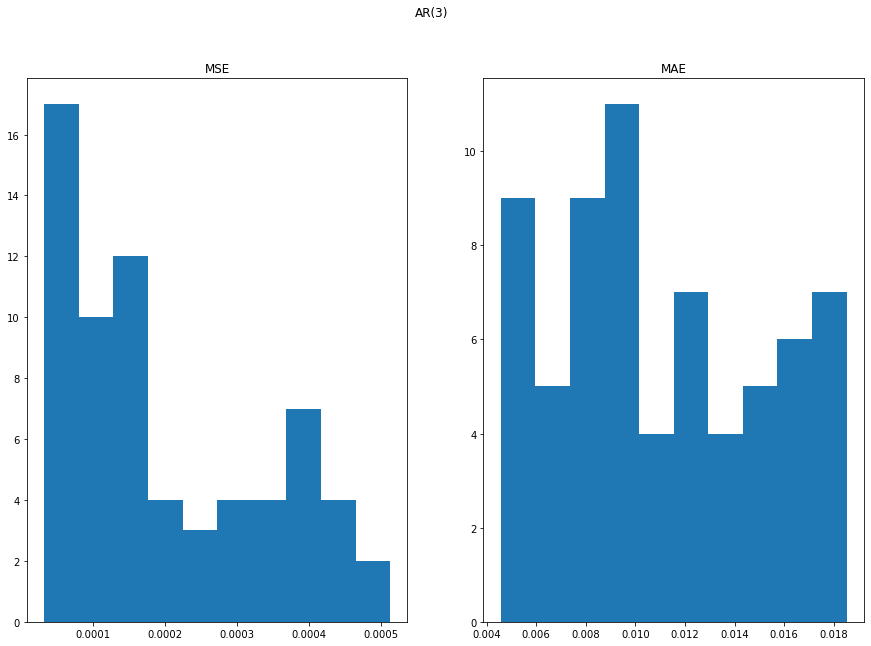

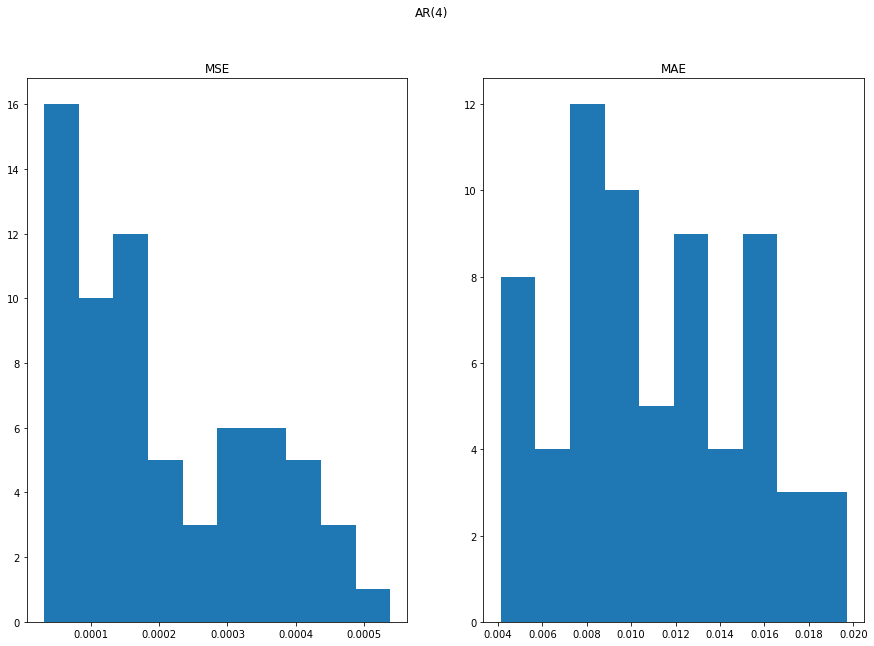

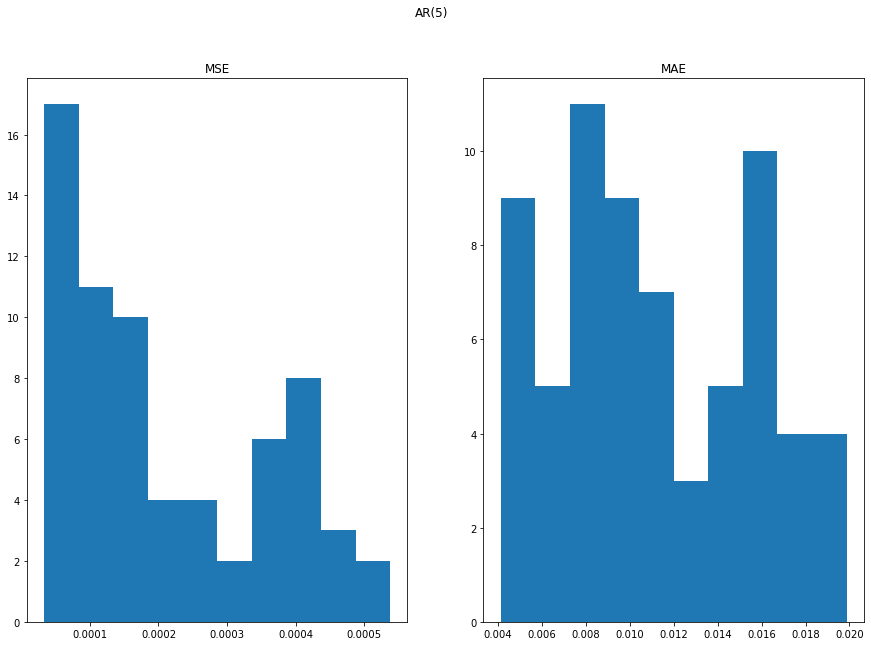

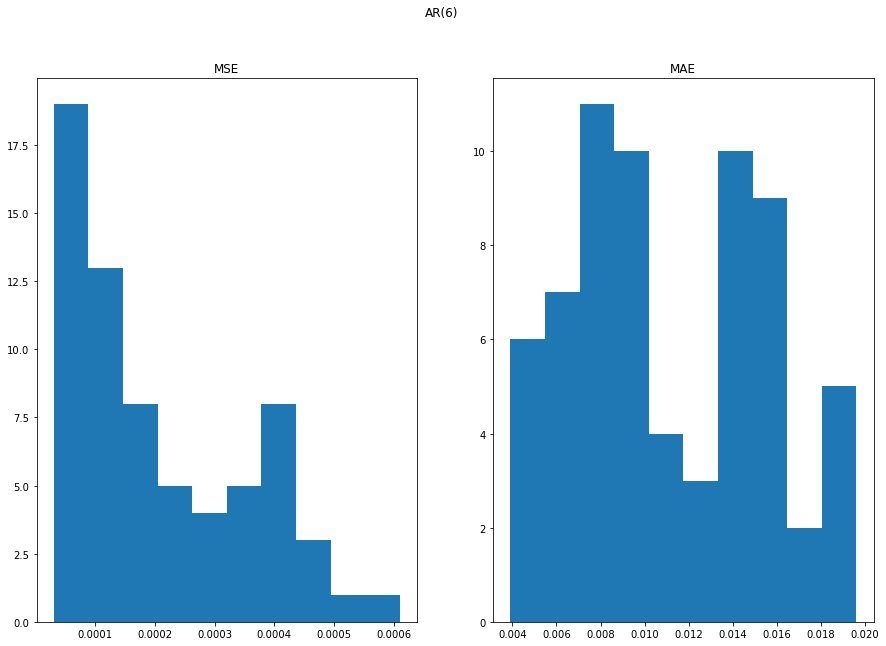

([0.011788975424504447,
  0.011940841898324003,
  0.012788430721687182,
  0.013354677194009207,
  0.01341704035354423,
  0.014013600350013453,
  0.01387386248067931],
 [0.7007717383970837,
  0.7043878718156467,
  0.7252401459435273,
  0.7373470900157743,
  0.7399613891336282,
  0.7508734983032012,
  0.741943151787984])

In [89]:
AR(df_list_two,plots=True)

Thats much better.  It appears that an AR(0) model, i.e. the average, is the best estimator. MSE AR(0)= 0.011788975424504447 and MAE AR(0)= 0.7007717383970837

It seems that our models do not have more predictive power than the average. Sometimes the simplest model is the best one. We will look at the distribution of the averages for all time series.


In [43]:
len(df_list_two)

67

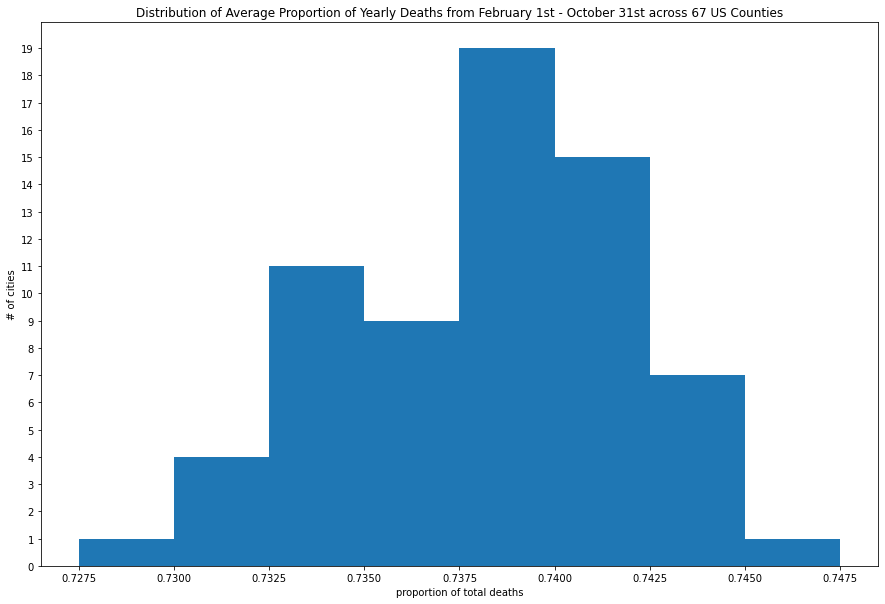

In [45]:
average_list=[]
for df in df_list_two:
    average=df['month/year'].mean()
    average_list.append(average)
plt.hist(average_list,bins=np.arange(.7275,.7475,.0025))
plt.yticks(np.arange(0,20,1))
plt.xlabel('proportion of total deaths')
plt.ylabel('# of cities')
plt.title('Distribution of Average Proportion of Yearly Deaths from February 1st - October 31st across 67 US Counties')
plt.show()


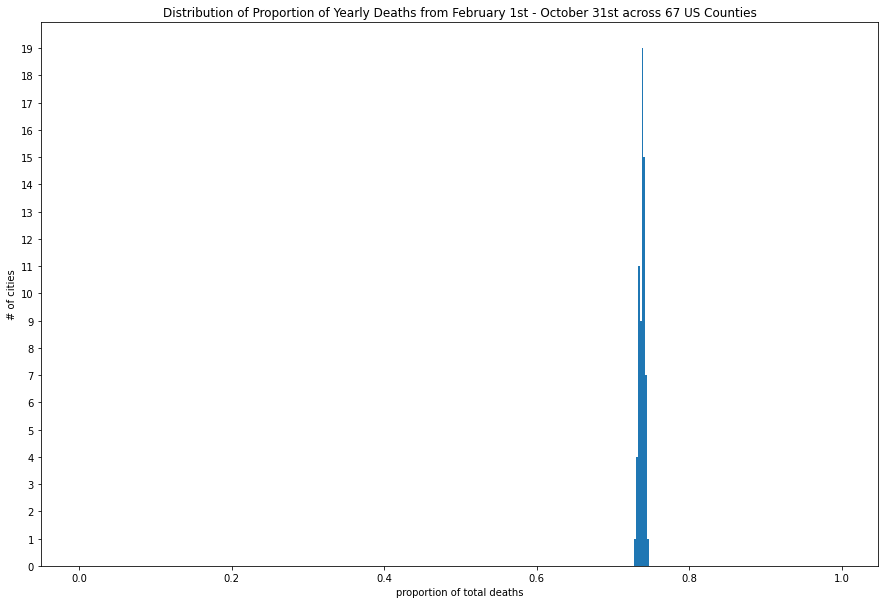

In [105]:
plt.hist(average_list,bins=np.arange(0,1,.0025))
plt.yticks(np.arange(0,20,1))
plt.xlabel('proportion of total deaths')
plt.ylabel('# of cities')
plt.title('Distribution of Proportion of Yearly Deaths from February 1st - October 31st across 67 US Counties')
plt.show()

Lets bootstrap a confidence interval from the list of averages

In [91]:
from random import sample
average_list_bootstrap=[]
for i in range(10000):
    x=sample(average_list,len(average_list))
    average_list_bootstrap.append(np.mean(x))

In [92]:
np.array(average_list_bootstrap).max()-np.array(average_list_bootstrap).min()

4.440892098500626e-16

In [93]:
mean_death=np.percentile(np.array(average_list_bootstrap),50)
lower_99_death=np.percentile(np.array(average_list_bootstrap),1)
upper_99_death=np.percentile(np.array(average_list_bootstrap),99)

In [94]:
print('Expected Proportion of Yearly Deaths from February Through October 2020: '+str(mean_death))
print('Bootstrapped 99% CI: '+str((lower_99_death,upper_99_death)))

Expected Proportion of Yearly Deaths from February Through October 2020: 0.7382017675180627
Bootstrapped 99% CI: (0.7382017675180625, 0.7382017675180629)


Using the expected proportion of yearly deaths from February-October calculated in the 'CDC_Mortality_City' notebook, we can find the expected number of deaths in each FIPS code for this time period 

In [95]:
Oct_Prop=0.7382017675180627
Oct_Prop_L99=0.7382017675180625
Oct_Prop_U99=0.7382017675180629

In [96]:
df_final['OctTotal']=df_final['deaths']*Oct_Prop
df_final['OctTotal_L']=df_final['deaths_L95']*Oct_Prop_L99
df_final['OctTotal_U']=df_final['deaths_U95']*Oct_Prop_U99
df_final.head()

NameError: name 'df_final' is not defined

# Johns Hopkins Cumulative Deaths Due to Covid-19

### Importing, Cleaning and Selecting Features 

We are looking for the cumulative reported deaths due to Covid-19 by FIPS code as of 07/31/20.  Johns Hopkins Covid-19 github repository can be found at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [75]:
df_JHU=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
df_JHU.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,39,39,39,39,39,41,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,98,98,98,98,98
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,10,10,10,10,10,11
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,18,17,17,17,17,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,35,36,36,36,36,39,40,40,40,40


In [76]:
df_JHU=df_JHU[['FIPS','Admin2','Province_State','10/31/20']]
df_JHU.head()

,FIPS,Admin2,Province_State,10/31/20
0,1001.0,Autauga,Alabama,31
1,1003.0,Baldwin,Alabama,71
2,1005.0,Barbour,Alabama,9
3,1007.0,Bibb,Alabama,15
4,1009.0,Blount,Alabama,25


In [77]:
#Checking for null values
df_JHU[df_JHU['FIPS'].isnull()]

,FIPS,Admin2,Province_State,10/31/20
1267,NaN,Dukes and Nantucket,Massachusetts,2
1304,NaN,Federal Correctional Institution (FCI),Michigan,5
1336,NaN,Michigan Department of Corrections (MDOC),Michigan,75
1591,NaN,Kansas City,Missouri,213
2954,NaN,Bear River,Utah,18
2959,NaN,Central Utah,Utah,10
2978,NaN,Southeast Utah,Utah,5
2979,NaN,Southwest Utah,Utah,57
2982,NaN,TriCounty,Utah,3
2990,NaN,Weber-Morgan,Utah,36


In [78]:
df_JHU[df_JHU['FIPS'].isnull()]['10/31/20'].sum()

424

In [79]:
df_JHU=df_JHU[['FIPS','10/31/20']].dropna()
df_JHU.columns=['FIPS','deaths_10/31/20']
df_JHU['FIPS']=df_JHU['FIPS'].astype(int).astype(str).str.rstrip('.0').str.strip().apply(lambda x : x.zfill(5))
df_JHU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3339
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIPS             3330 non-null   object
 1   deaths_10/31/20  3330 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [80]:
df_JHU=df_JHU.set_index('FIPS')
df_JHU.head()

,deaths_10/31/20
FIPS,
01001,31
01003,71
01005,9
01007,15
01009,25


Now lets merge the Johns Hopkins Data with the CDC death counts for 2020

In [81]:
df_final=df_final.join(df_JHU,how='inner')

In [82]:
df_final=df_final.drop(['deaths','deaths_L95','deaths_U95'],axis=1)
df_final.columns=['OctTotal', 'OctTotal_L',
       'OctTotal_U', 'JHU_10/31/20']

In [83]:
df_final.head()

,OctTotal,OctTotal_L,OctTotal_U,JHU_10/31/20
FIPS,,,,
01001,403.102731,360.343976,446.039748,31
01003,1743.924270,1650.574883,1835.648937,71
01005,212.256347,171.816976,253.258241,9
01007,199.665691,176.497744,222.973929,15
01009,516.255216,467.984995,564.584022,25


# CDC Total Deaths 02/01/2020-10/31/2020

The total deaths by FIPS code is released by the CDC on a weekly basis.  Unfortunately, the database only provides cumulative data for each week.  The dataset for 10/31/20 can no longer be obtained, but it was downloaded for use in the first week of november.  

In [84]:
df_cdc=pd.read_csv(r'Data\CDC_Covid_County.csv')

In [85]:
df_cdc.head()

,Date as of,First week,Last week,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes
0,11/04/2020,02/01/2020,10/31/2020,AK,Anchorage Borough,2020,Medium metro,48,1544
1,11/04/2020,02/01/2020,10/31/2020,AK,Fairbanks North Star Borough,2090,Small metro,14,368
2,11/04/2020,02/01/2020,10/31/2020,AL,Autauga County,1001,Medium metro,27,386
3,11/04/2020,02/01/2020,10/31/2020,AL,Baldwin County,1003,Small metro,85,1664
4,11/04/2020,02/01/2020,10/31/2020,AL,Barbour County,1005,Noncore,13,205


In [86]:
df_cdc.columns=['Date as of', 'First week', 'Last week', 'State', 'County name',
       'FIPS', 'Urban Rural Code', 'Deaths involving COVID-19',
       'Deaths from All Causes']

In [87]:
df_cdc.FIPS=df_cdc.FIPS.astype(str).str.strip().apply(lambda x: x.zfill(5))

In [88]:
df_cdc=df_cdc[['FIPS','Deaths involving COVID-19','Deaths from All Causes']]

In [89]:
df_cdc.columns=['FIPS','CDC_Covid_10/31/20','CDC_Total_10/31/20']

In [90]:
final=df_cdc.set_index('FIPS').join(df_final,how='inner')

In [91]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 01001 to 56025
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDC_Covid_10/31/20  1221 non-null   int64  
 1   CDC_Total_10/31/20  1221 non-null   int64  
 2   OctTotal            1221 non-null   float64
 3   OctTotal_L          1221 non-null   float64
 4   OctTotal_U          1221 non-null   float64
 5   JHU_10/31/20        1221 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 66.8+ KB


# Final Analysis

Lets first look into the counties with total deaths greater than the upper bound of expected deaths

In [92]:
FIPS_excess=final.loc[final['CDC_Total_10/31/20']>final['OctTotal_U']]
FIPS_excess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 01055 to 56025
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDC_Covid_10/31/20  486 non-null    int64  
 1   CDC_Total_10/31/20  486 non-null    int64  
 2   OctTotal            486 non-null    float64
 3   OctTotal_L          486 non-null    float64
 4   OctTotal_U          486 non-null    float64
 5   JHU_10/31/20        486 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 26.6+ KB


486 US counties appear to have a significant amount of excess deaths

In [93]:
FIPS_excess['excess_estimate']=FIPS_excess['CDC_Total_10/31/20']-FIPS_excess['OctTotal_U']

In [94]:
FIPS_excess['excess_estimate'].sum()

272444.3828338701

Now lets look at the counties with deaths less than the lower bound of expected deaths

In [95]:
FIPS_under=final.loc[final['CDC_Total_10/31/20']<final['OctTotal_L']]
FIPS_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 01007 to 55135
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDC_Covid_10/31/20  333 non-null    int64  
 1   CDC_Total_10/31/20  333 non-null    int64  
 2   OctTotal            333 non-null    float64
 3   OctTotal_L          333 non-null    float64
 4   OctTotal_U          333 non-null    float64
 5   JHU_10/31/20        333 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.2+ KB


333 FIPS codes have significantly less deaths so far this year

In [96]:
FIPS_under['under_estimate']=FIPS_under['OctTotal_U']-FIPS_under['CDC_Total_10/31/20']

In [97]:
FIPS_under['under_estimate'].sum()

61544.12002793717

In [98]:
print('Total estimated excess deaths: ' + str(FIPS_excess['excess_estimate'].sum()-FIPS_under['under_estimate'].sum()))

Total estimated excess deaths: 210900.26280593296


In [99]:
print('JHU reported covid deaths: ' + str(final['JHU_10/31/20'].sum()))

JHU reported covid deaths: 210533


In [100]:
print('CDC reported covid deaths: ' + str(final['CDC_Covid_10/31/20'].sum()))

CDC reported covid deaths: 211106


### Conclusion

In these 1221 counties we can say with a high level of confidence that from 02/01/2020-10/31/2020 combined excess deaths reached at least 210900.  After this analysis one can be fairly certain that the mainstream reporting of deaths due to Covid-19 has not been skewed to the upside, at least for these 1221 counties.  The numbers seem to be spot on. Elon Musk was wrong, or at least he did not have enough evidence to make the strong claims that he did. Given this analysis, there is no reason to believe that the covid data has been skewed to the upside.  